# 📦 Importing essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 🚫 Ignore warnings
warnings.filterwarnings("ignore")

# 🎨 Set Seaborn style
sns.set_style("whitegrid")      # Valid seaborn style
sns.set_palette("Set2")         # Nice readable color set

# 📐 Pandas display settings (optional for wider views)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [ ]:
df= pd.read_csv(r"D:\sql_python_mastery\python_projects_analyses\8_Uber_ Analysis\Uber_data_SM.csv")


In [5]:
df.shape


(966, 12)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE   966 non-null    object 
 1   END_DATE     966 non-null    object 
 2   CATEGORY     966 non-null    object 
 3   START        966 non-null    object 
 4   STOP         966 non-null    object 
 5   MILES        966 non-null    float64
 6   PURPOSE      966 non-null    object 
 7   hour         966 non-null    int64  
 8   weekday      966 non-null    object 
 9   month        966 non-null    int64  
 10  day_type     966 non-null    object 
 11  part_of_day  966 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 90.7+ KB


In [7]:
df.head(2)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,hour,weekday,month,day_type,part_of_day
0,01/01/2016 21:11,01/01/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,1,Weekday,Night
1,02/01/2016 1:25,02/01/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Personal,1,Saturday,1,Weekend,Late Night


In [8]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce' )
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce' ) 


In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE   966 non-null    datetime64[ns]
 1   END_DATE     966 non-null    datetime64[ns]
 2   CATEGORY     966 non-null    object        
 3   START        966 non-null    object        
 4   STOP         966 non-null    object        
 5   MILES        966 non-null    float64       
 6   PURPOSE      966 non-null    object        
 7   hour         966 non-null    int64         
 8   weekday      966 non-null    object        
 9   month        966 non-null    int64         
 10  day_type     966 non-null    object        
 11  part_of_day  966 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 90.7+ KB
None


In [ ]:
print("Null START_DATE:", df['START_DATE'].isnull().sum())
print("Data type:", df['START_DATE'].dtype)


Null START_DATE: 0
Data type: datetime64[ns]


# 🚗 Business Demand Insights

# Data Visualization

## Q1. What are the different categories of Uber rides, and which one is most popular?

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

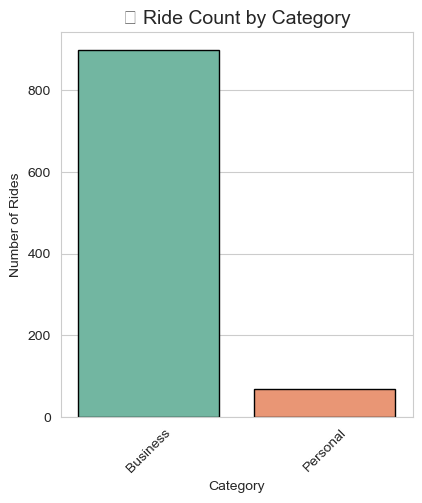

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Chart 1: CATEGORY count
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=df, palette='Set2', edgecolor='black')
plt.title("🚕 Ride Count by Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)


 ## Q2. What are the most common ride purposes among users?

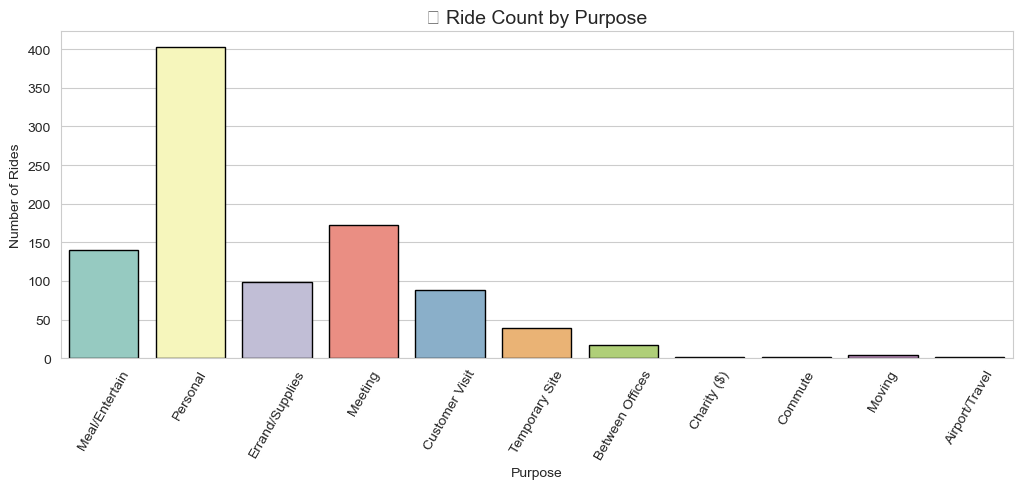

In [12]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=df, palette='Set3', edgecolor='black')
plt.title("🎯 Ride Count by Purpose", fontsize=14)
plt.xlabel("Purpose")
plt.ylabel("Number of Rides")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


## Q3. How do different categories perform in terms of total miles traveled?

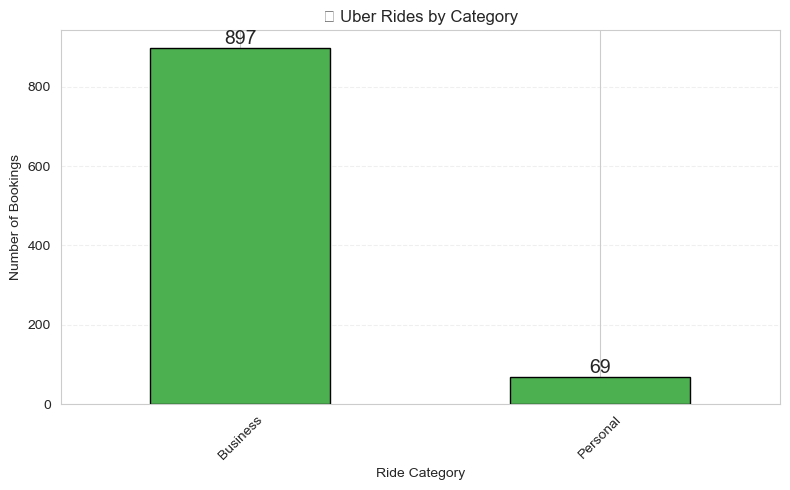

In [13]:
category_counts = df['CATEGORY'].value_counts()
plt.figure(figsize=(6,4))
ax = category_counts.plot(kind='bar', color='#4CAF50', edgecolor='black', figsize=(8,5))
plt.title("🚕 Uber Rides by Category")
plt.xlabel("Ride Category")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# ✅ Add data labels
for idx, val in enumerate(category_counts):
    ax.text(idx, val + 0, int(val), ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()


## Q4. At what times of day do people book cabs most frequently?

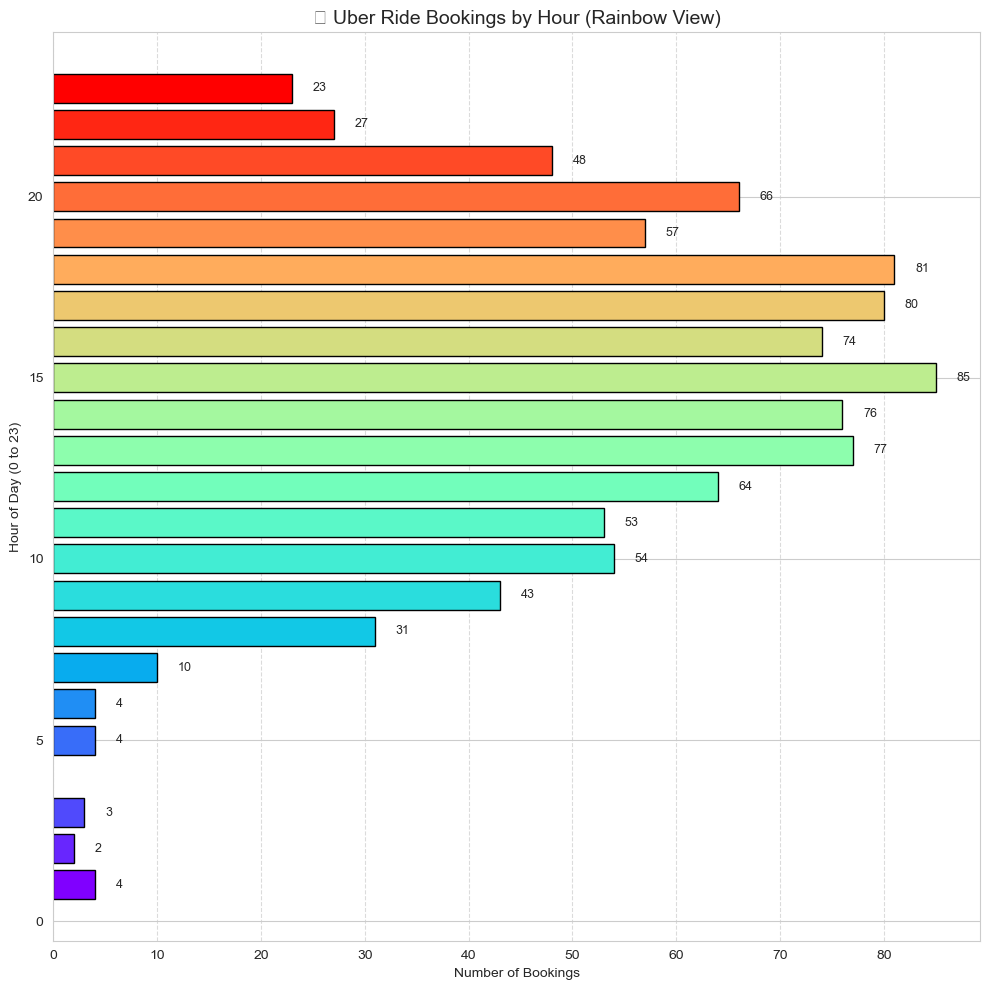

In [14]:
import matplotlib.pyplot as plt
import numpy as np
hourly_rides = df['hour'].value_counts().sort_index()
# 🎨 Generate rainbow colors for each bar
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(hourly_rides)))

plt.figure(figsize=(10,10))
bars = plt.barh(hourly_rides.index, hourly_rides.values, color=rainbow_colors, edgecolor='black')

plt.title("🌈 Uber Ride Bookings by Hour (Rainbow View)", fontsize=14)
plt.xlabel("Number of Bookings")
plt.ylabel("Hour of Day (0 to 23)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 🏷️ Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2, int(width), va='center', fontsize=9)

plt.tight_layout()
plt.show()


## Q5. Which days of the week see the highest ride bookings?

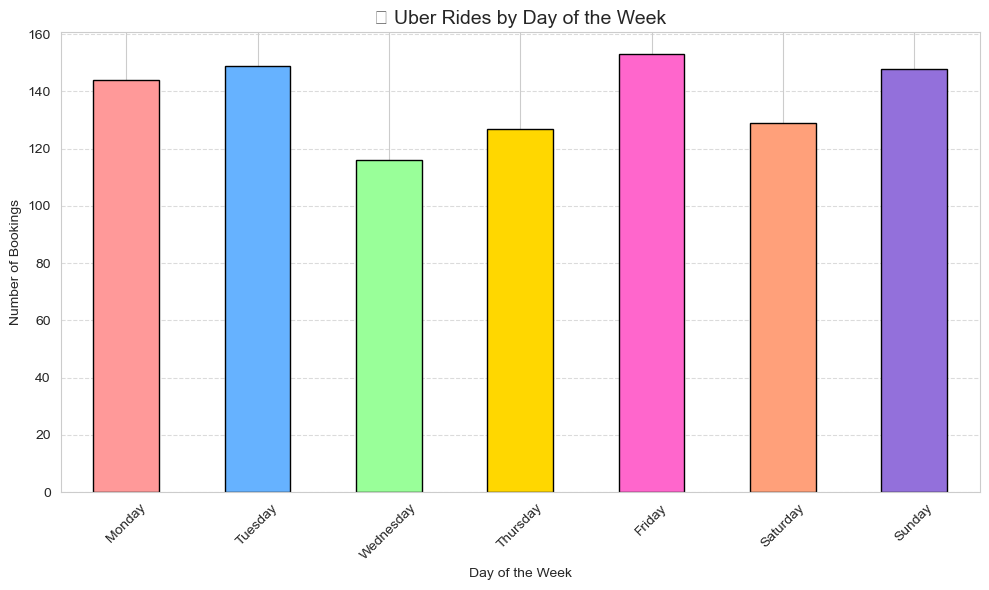

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 🎨 Define a set of 7 colors for 7 weekdays
weekday_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF66CC', '#FFA07A', '#9370DB']

# Extract weekday names and count rides in calendar order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['START_DATE'].dt.day_name().value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color=weekday_colors, edgecolor='black')

plt.title("🗓 Uber Rides by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
df.head(2)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,hour,weekday,month,day_type,part_of_day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,1,Weekday,Night
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Personal,1,Monday,1,Weekend,Late Night


## Q6. During which months is Uber usage the lowest?

<AxesSubplot:>

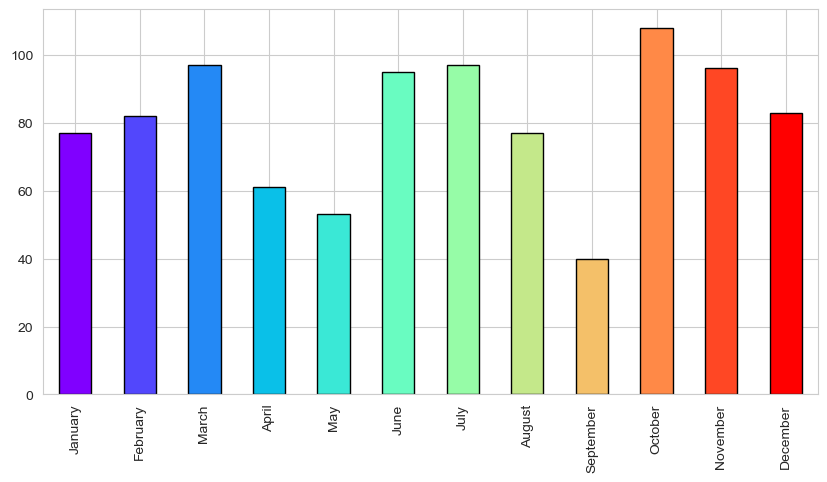

In [19]:
df['month'] = pd.to_datetime(df['START_DATE']).dt.month_name()

# 📊 Count rides per month (sorted by calendar order)
monthly_rides = df['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
# Create rainbow colors using a colormap
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(monthly_rides)))

plt.figure(figsize=(10,5))
monthly_rides.plot(kind='bar', color=rainbow_colors, edgecolor='black')


# Q7. Are there specific peak hours on weekdays vs weekends?

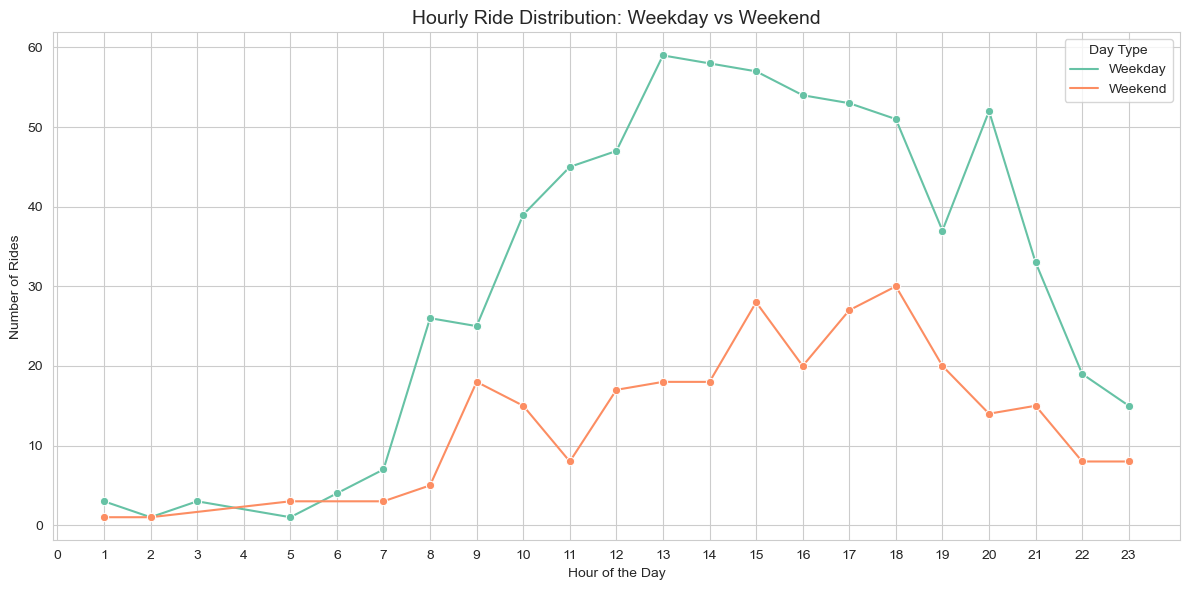

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime column is parsed
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Extract hour and day of week
df['hour'] = df['START_DATE'].dt.hour
df['weekday'] = df['START_DATE'].dt.dayofweek  # Monday=0, Sunday=6

# Create a new column to classify as Weekday or Weekend
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day_type
hourly_type_rides = df.groupby(['hour', 'day_type']).size().reset_index(name='ride_count')

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_type_rides, x='hour', y='ride_count', hue='day_type', marker='o')
plt.title('Hourly Ride Distribution: Weekday vs Weekend', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


# Q8. What is the distribution of ride requests by hour throughout the day?

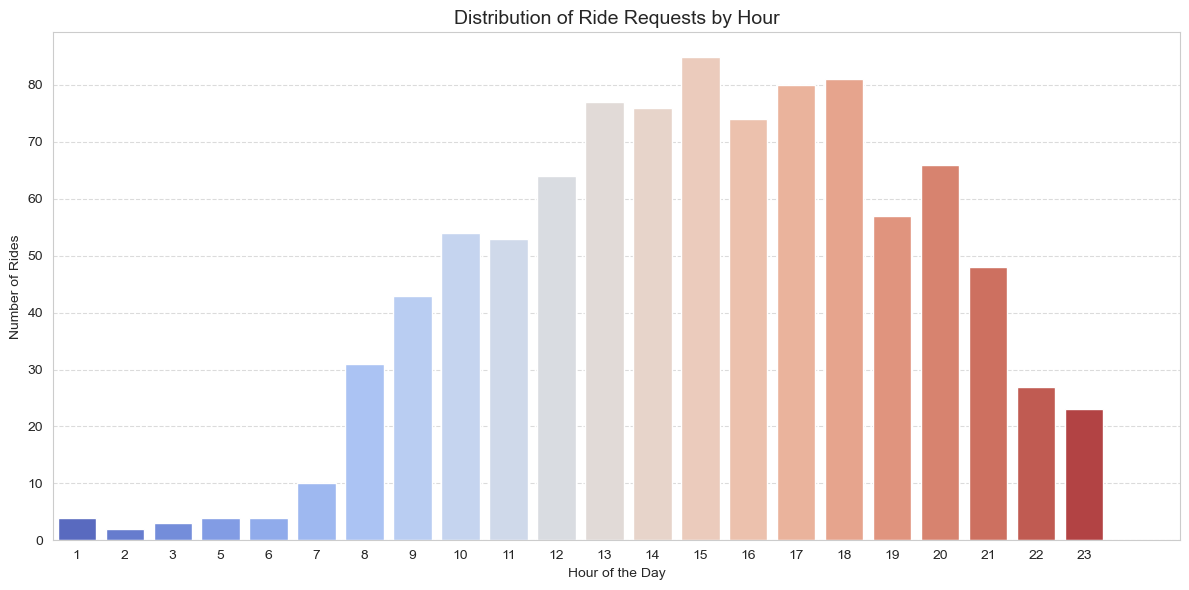

In [21]:
# Ensure 'hour' column is present
df['hour'] = df['START_DATE'].dt.hour

# Group by hour
hourly_rides = df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=hourly_rides.index, y=hourly_rides.values, palette='coolwarm')
plt.title('Distribution of Ride Requests by Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Q9. Is there a correlation between trip distance and time of booking?

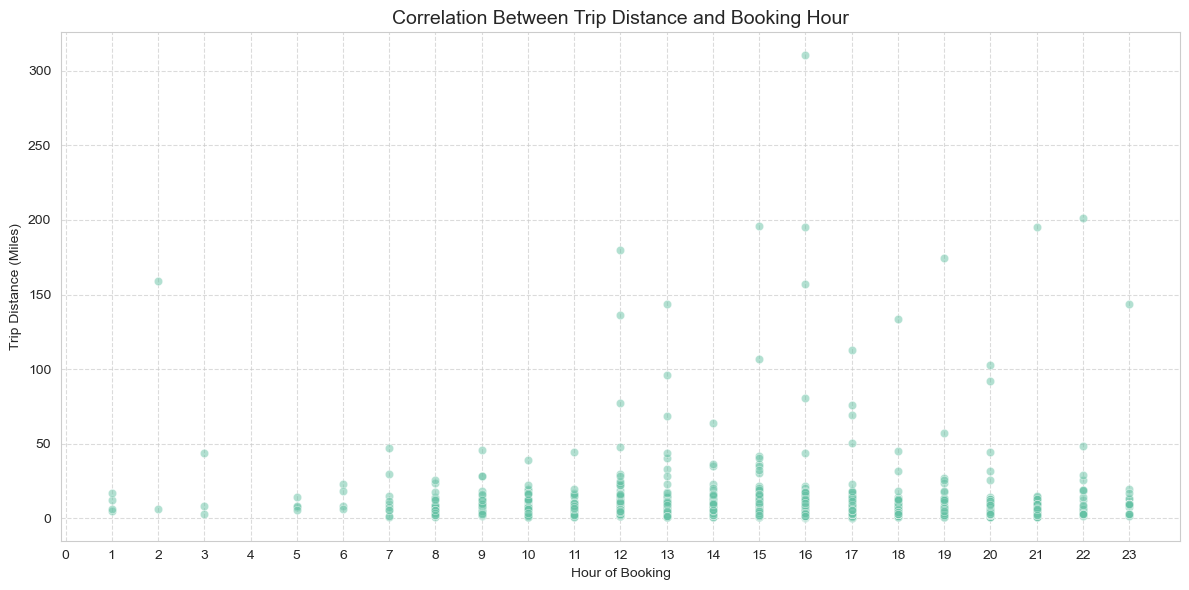

Correlation between hour of booking and trip distance: 0.00


In [22]:
import numpy as np

# Ensure datetime and distance columns are ready
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['hour'] = df['START_DATE'].dt.hour

# Drop any rows with missing distance values
df_filtered = df.dropna(subset=['MILES'])

# Plot: Scatter plot of hour vs distance
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filtered, x='hour', y='MILES', alpha=0.5)
plt.title('Correlation Between Trip Distance and Booking Hour', fontsize=14)
plt.xlabel('Hour of Booking')
plt.ylabel('Trip Distance (Miles)')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df_filtered['hour'].corr(df_filtered['MILES'])
print(f"Correlation between hour of booking and trip distance: {correlation:.2f}")


# 📍 Location-Based & Distance Insights

## Q10. What are the most common pickup locations?

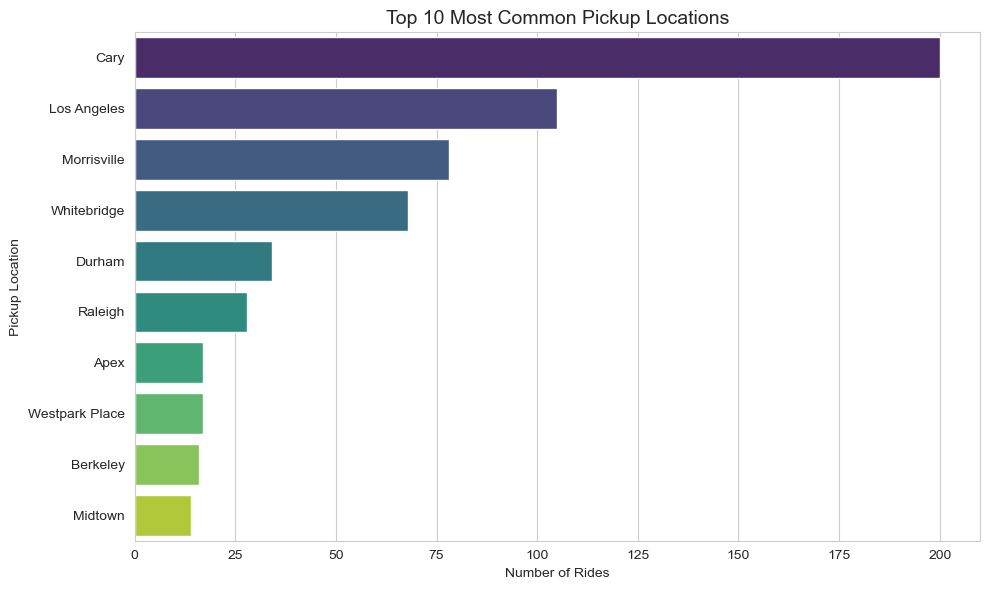

In [23]:
# Check column name for pickup — assuming 'START' is used
top_pickups = df['START'].value_counts().head(10).reset_index()
top_pickups.columns = ['Pickup Location', 'Ride Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_pickups, y='Pickup Location', x='Ride Count', palette='viridis')
plt.title('Top 10 Most Common Pickup Locations', fontsize=14)
plt.xlabel('Number of Rides')
plt.ylabel('Pickup Location')
plt.tight_layout()
plt.show()


## Q11. What are the most common drop-off points?

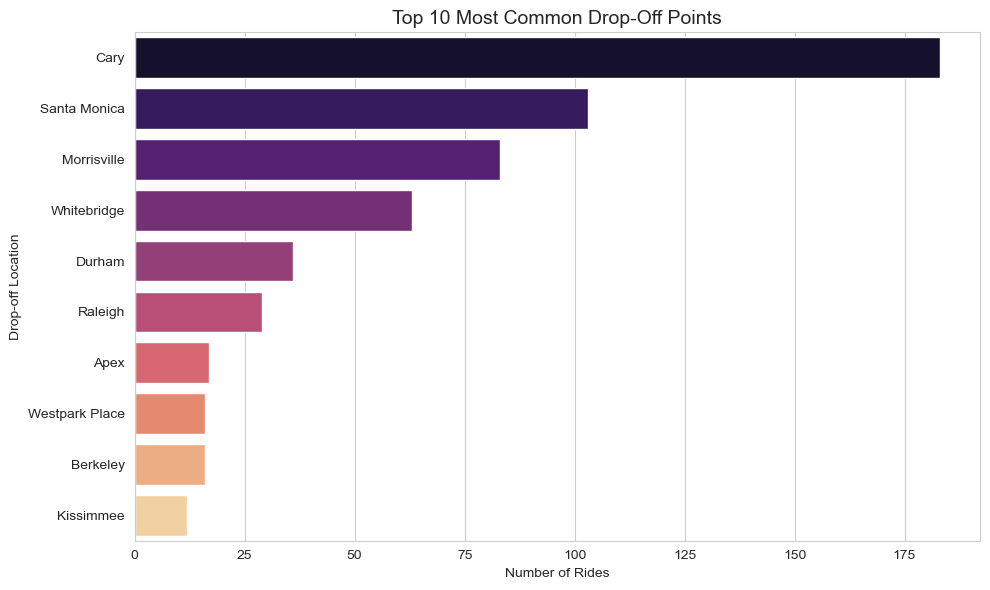

In [24]:
# Assuming drop-off location is stored in column 'STOP'
top_dropoffs = df['STOP'].value_counts().head(10).reset_index()
top_dropoffs.columns = ['Drop-off Location', 'Ride Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_dropoffs, y='Drop-off Location', x='Ride Count', palette='magma')
plt.title('Top 10 Most Common Drop-Off Points', fontsize=14)
plt.xlabel('Number of Rides')
plt.ylabel('Drop-off Location')
plt.tight_layout()
plt.show()


## Q12. What is the average trip distance per category (e.g., Business vs Personal)?

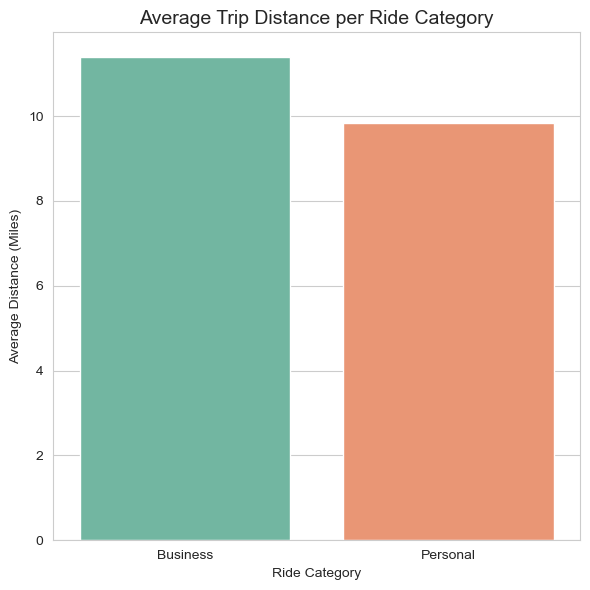

In [27]:
# Group by category and calculate average miles
avg_distance_category = df.groupby('CATEGORY')['MILES'].mean().reset_index()
avg_distance_category = avg_distance_category.sort_values(by='MILES', ascending=False)

# Plot
plt.figure(figsize=(6,6))
sns.barplot(data=avg_distance_category, x='CATEGORY', y='MILES', palette='Set2')
plt.title('Average Trip Distance per Ride Category', fontsize=14)
plt.xlabel('Ride Category')
plt.ylabel('Average Distance (Miles)')
plt.tight_layout()
plt.show()


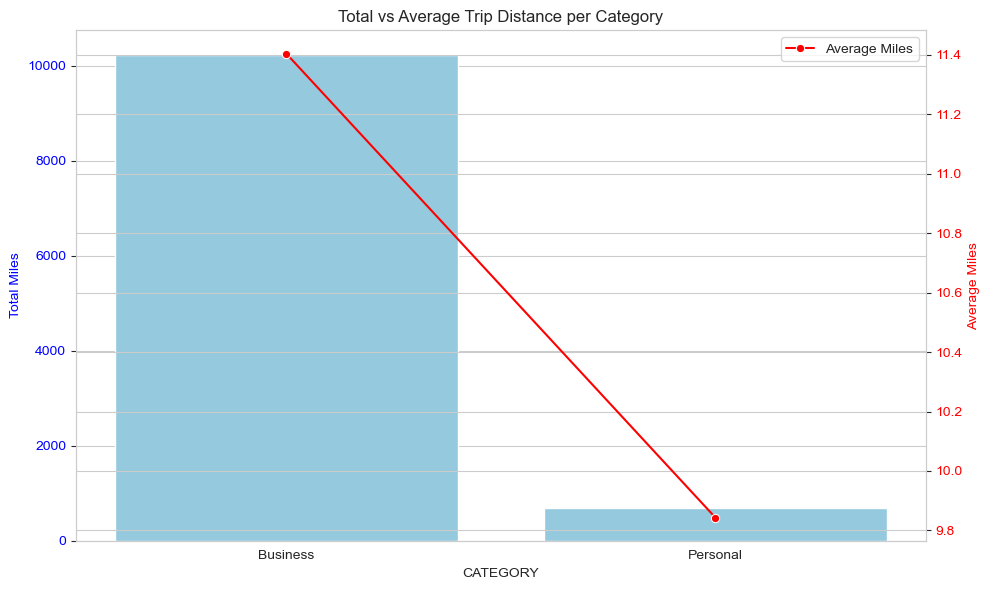

In [28]:
# Total miles
total_miles = df.groupby('CATEGORY')['MILES'].sum().reset_index().rename(columns={'MILES': 'Total Miles'})

# Average miles
avg_miles = df.groupby('CATEGORY')['MILES'].mean().reset_index().rename(columns={'MILES': 'Average Miles'})

# Merge
combined = pd.merge(total_miles, avg_miles, on='CATEGORY')

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(data=combined, x='CATEGORY', y='Total Miles', ax=ax1, color='skyblue', label='Total Miles')
ax1.set_ylabel('Total Miles', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=combined, x='CATEGORY', y='Average Miles', ax=ax2, marker='o', color='red', label='Average Miles')
ax2.set_ylabel('Average Miles', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total vs Average Trip Distance per Category')
plt.tight_layout()
plt.show()


# Q13. What is the average distance (in miles) people travel using Uber?

In [29]:
# Calculate overall average distance
average_distance = df['MILES'].mean()

print(f"🚕 The average distance people travel using Uber is: {average_distance:.2f} miles.")


🚕 The average distance people travel using Uber is: 11.29 miles.


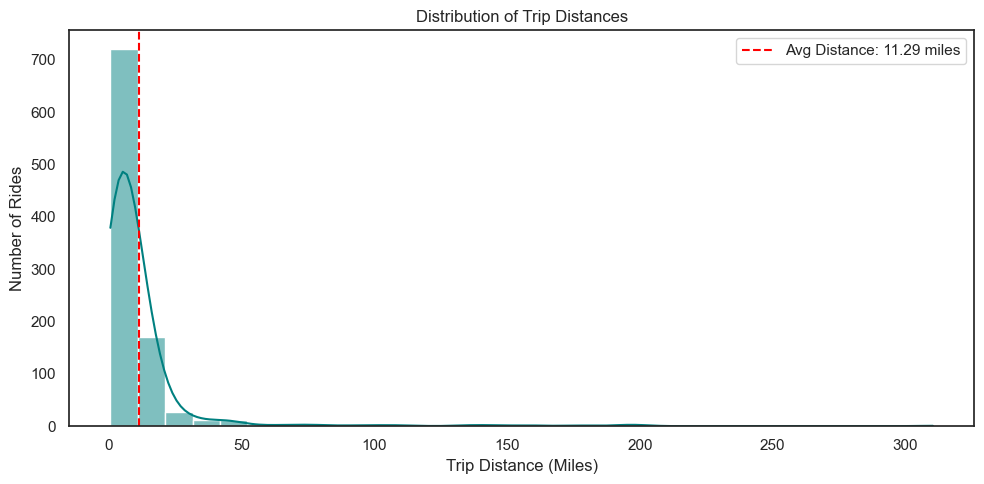

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['MILES'], bins=30, kde=True, color='teal')
plt.axvline(average_distance, color='red', linestyle='--', label=f'Avg Distance: {average_distance:.2f} miles')
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Number of Rides')
plt.legend()
plt.tight_layout()
plt.show()


# 🔥 Bonus 1: Heatmap – Ride Frequency by Day vs Hour

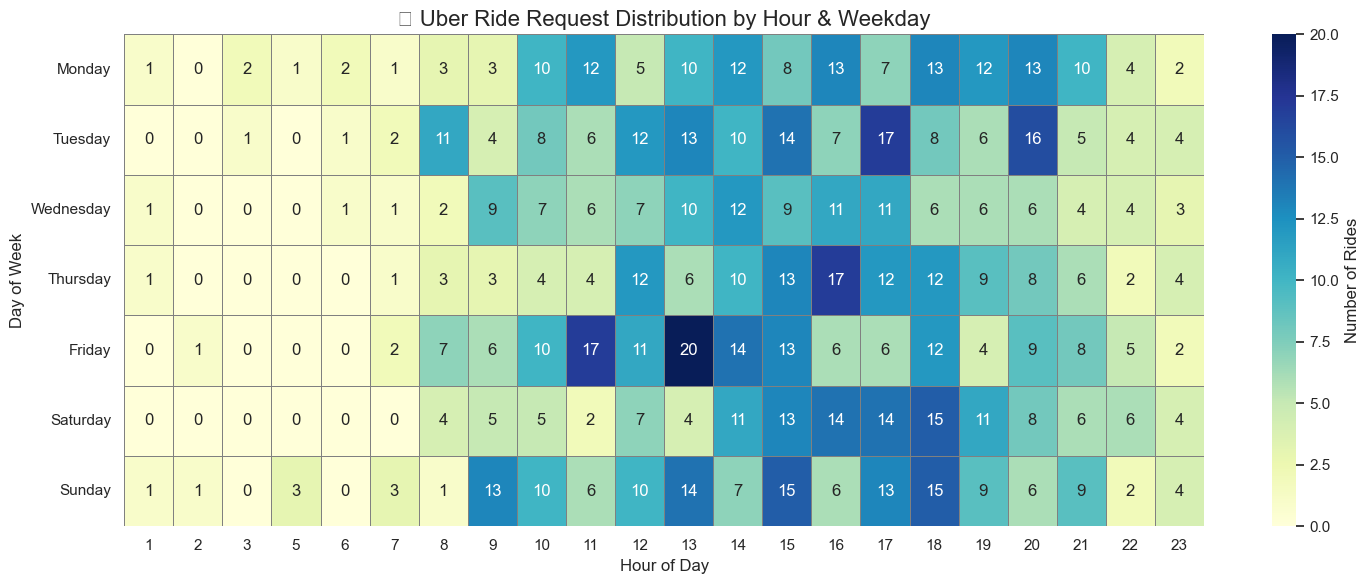

In [30]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🗓 Convert START_DATE to datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# 🔍 Extract weekday and hour from START_DATE
df['weekday'] = df['START_DATE'].dt.day_name()
df['hour'] = df['START_DATE'].dt.hour

# 🔄 Create a pivot table (weekday as rows, hour as columns, values = ride counts)
heatmap_data = df.pivot_table(index='weekday', columns='hour', values='MILES',
                              aggfunc='count', fill_value=0)

# 📆 Reorder weekdays for better calendar flow
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# 🎨 Plot the heatmap
plt.figure(figsize=(15, 6))  # Wider layout for hour spread
sns.set(style="white")  # Clean background
sns.heatmap(heatmap_data,
            cmap="YlGnBu",        # Blue-green gradient
            linewidths=0.4,       # Grid line thickness
            linecolor='gray',     # Grid line color
            annot=True, fmt='d',  # Show ride counts in cells
            cbar_kws={'label': 'Number of Rides'})  # Colorbar label

# 🏷 Add titles and labels
plt.title("🚕 Uber Ride Request Distribution by Hour & Weekday", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

# 📊 Show plot
plt.show()



# 🥧 Bonus 2: Pie Chart – Percentage Share of Each Ride Purpose

In [36]:
# Filter out missing or unknown purposes
df_clean = df[df['PURPOSE'].notna() & (df['PURPOSE'] != 'Unknown')]

# Recalculate purpose counts
purpose_counts = df_clean['PURPOSE'].value_counts()


In [33]:
# Threshold to include top N only
top_n = 5

# Grouping less frequent purposes into 'Other'
purpose_counts = df_clean['PURPOSE'].value_counts()
top_purposes = purpose_counts[:top_n]
others = pd.Series(purpose_counts[top_n:].sum(), index=['Other'])

# Combine top + other
final_purpose_counts = pd.concat([top_purposes, others])



# 📉 Bonus 3: Line Chart – Monthly Booking Trend

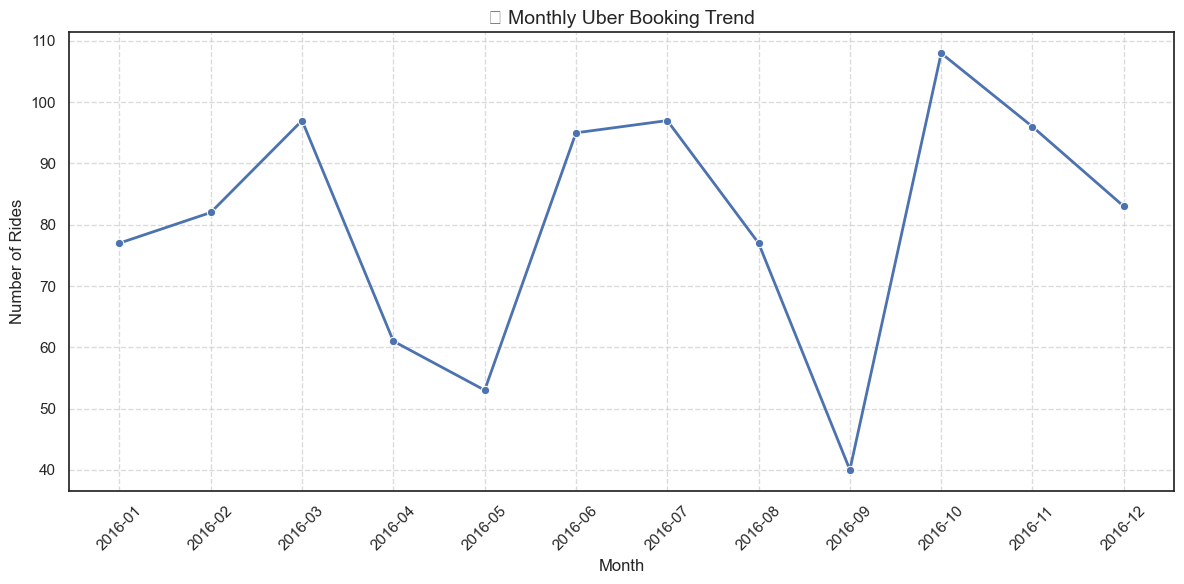

In [34]:
# Create month column
df['month'] = df['START_DATE'].dt.to_period('M').astype(str)

# Count rides per month
monthly_rides = df['month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_rides.index, y=monthly_rides.values, marker='o', linewidth=2)
plt.title('📉 Monthly Uber Booking Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
